In [1]:
#Logistic Regression 

In [113]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
import seaborn as sns 
from seaborn import heatmap
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [29]:
#we will look at the titanic dataset 
df = pd.read_csv("titanic.csv")
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [30]:
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [31]:
df.isna().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [32]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


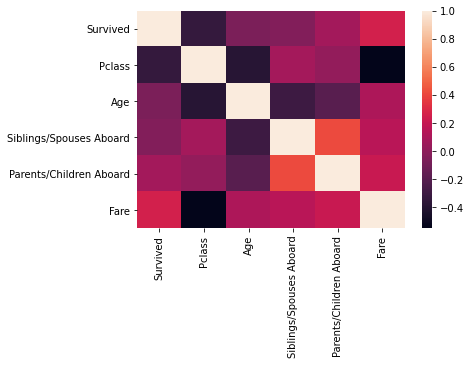

In [33]:
corr = df.corr()
ht = heatmap(corr)


In [15]:
# we can see that fare has a high correlation with survived 
df['Survived'].unique()

array([0, 1], dtype=int64)

In [51]:
df = df.drop(columns=['Name'])

In [54]:
lb = LabelEncoder() 
df['Sex'] = lb.fit_transform(df['Sex'])

In [55]:
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [57]:
# We will see if a higher fare for the ticket helps one survive on titanic 
# our feature for prediction is fare 
# to be able to make a realistic model we need to make sure our data is normalised 
# for that we will use a Standard Scalar object to make sure our data is normalised 

x = np.array(df.loc[:, df.columns != 'Survived'])
y = np.array(df['Survived'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

In [88]:
sc_X = StandardScaler() 
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)
log = LogisticRegression(solver='lbfgs', max_iter=1000) 
logres_model = log.fit(x_train, y_train.ravel())

In [89]:
y_pred = logres_model.predict(x_test)

In [90]:
print("train: ", logres_model.score(x_train, y_train))
print("test: ", logres_model.score(x_test, y_test))
print("")

train:  0.8025387870239774
test:  0.8089887640449438



In [91]:
cm = confusion_matrix(y_test, y_pred)

In [92]:
cm

array([[99, 13],
       [21, 45]], dtype=int64)

In [93]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [94]:
print("                 PREDICTION")
print("                __0_____1__")
print("OBSERVATION  0 |", str(tn).rjust(2), "  ", str(fp).rjust(2), "|", tn+fp)
print("             1 |", str(fn).rjust(2), "  ", str(tp).rjust(2), "|", fn+tp)
print("               ------------")
print("                ", tn+fn, "  ", fp+tp, " ", tn+fp+fn+tp)

                 PREDICTION
                __0_____1__
OBSERVATION  0 | 99    13 | 112
             1 | 21    45 | 66
               ------------
                 120    58   178


In [112]:
from matplotlib.colors import ListedColormap

(4254,)

In [114]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       112
           1       0.78      0.68      0.73        66

    accuracy                           0.81       178
   macro avg       0.80      0.78      0.79       178
weighted avg       0.81      0.81      0.81       178

